In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import os
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [70]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Loading the data
house_prc = pd.read_csv("train.csv", na_values="NAN")

In [72]:
house_prc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
house_prc.shape

(1460, 81)

There are 1460 rows and 81 columns. Lets check if there is any null values present.

In [74]:
house_prc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We see that there are null values present in many columns.

In [75]:
house_prc.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [76]:
#checking the summary of the dataset.
house_prc.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [77]:
#Calculating percentage of null values in each column

round(100*(house_prc.isnull().sum()/len(house_prc.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

### Data Cleaning



In [78]:
# Changing all year columns to their age
# Current year - Year

today = str(datetime.date.today())
currentYear = int(today[:4])

house_prc.YearBuilt = pd.to_numeric(house_prc.YearRemodAdd, errors='coerce')
house_prc.YearRemodAdd = pd.to_numeric(house_prc.YearRemodAdd, errors='coerce')
house_prc.YrSold = pd.to_numeric(house_prc.YrSold, errors='coerce')
house_prc.GarageYrBlt = pd.to_numeric(house_prc.GarageYrBlt, errors='coerce')

house_prc['AgeYearBuilt'] = currentYear - house_prc['YearBuilt']
house_prc['AgeRemodAdd'] = currentYear - house_prc['YearRemodAdd']
house_prc['AgeSold'] = currentYear - house_prc['YrSold']
house_prc['AgeGarageYrBlt'] = currentYear - house_prc['GarageYrBlt']

#Dropping the original year columns
house_prc = house_prc.drop(['YearBuilt', 'YearRemodAdd','YrSold', 'GarageYrBlt'], 1)

house_prc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,WD,Normal,208500,16,16,11,16.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,WD,Normal,181500,43,43,12,43.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,WD,Normal,223500,17,17,11,18.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,WD,Abnorml,140000,49,49,13,21.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,WD,Normal,250000,19,19,11,19.0


Checking the data dictionary we found that NA is an actual data field in some columns. We can replace NA with None for those columns.

In [79]:
# Replacing NaN with None

house_prc['Alley'].fillna('None', inplace=True)
house_prc['BsmtQual'].fillna('None', inplace=True)
house_prc['BsmtCond'].fillna('None', inplace=True)
house_prc['BsmtExposure'].fillna('None', inplace=True)
house_prc['BsmtFinType1'].fillna('None', inplace=True)
house_prc['BsmtFinType2'].fillna('None', inplace=True)
house_prc['FireplaceQu'].fillna('None', inplace=True)
house_prc['GarageType'].fillna('None', inplace=True)
house_prc['GarageFinish'].fillna('None', inplace=True)
house_prc['GarageQual'].fillna('None', inplace=True)
house_prc['GarageCond'].fillna('None', inplace=True)
house_prc['PoolQC'].fillna('None', inplace=True)
house_prc['Fence'].fillna('None', inplace=True)
house_prc['MiscFeature'].fillna('None', inplace=True)
house_prc['AgeGarageYrBlt'].fillna(2019, inplace=True)

In [80]:
round(100*(house_prc.isnull().sum()/len(house_prc.index)), 2)


Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage       17.74
LotArea            0.00
Street             0.00
Alley              0.00
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.55
MasVnrArea         0.55
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
BsmtQual           0.00
BsmtCond           0.00
                  ...  
KitchenQual        0.00
TotRmsAbvGrd       0.00
Functional         0.00
Fireplaces         0.00
FireplaceQu        0.00
GarageType         0.00
GarageFinish       0.00
GarageCars         0.00
GarageArea         0.00
GarageQual         0.00
GarageCond      

In [81]:
#Lets drop the ID column as it does not add any value to our analysis
house_prc = house_prc.drop('Id',axis='columns')


In [82]:
# Filling average value in 'LotFrontage' in Nan rows with mean of 'LotFrontage'

house_prc['LotFrontage'].fillna((house_prc['LotFrontage'].mean()), inplace = True)

In [83]:
# Removing rows where 'MasVnrType', 'MasVnrArea', 'Electrical' is NaN
house_prc = house_prc[pd.notnull(house_prc['MasVnrType'])]
house_prc = house_prc[pd.notnull(house_prc['MasVnrArea'])]
house_prc = house_prc[pd.notnull(house_prc['Electrical'])]

In [84]:
# Checking percentage of NaN values
round(100*(house_prc.isnull().sum()/len(house_prc.index)),2)

MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
Street            0.0
Alley             0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
BsmtExposure      0.0
                 ... 
KitchenQual       0.0
TotRmsAbvGrd      0.0
Functional        0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
GarageQual        0.0
GarageCond        0.0
PavedDrive        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
EnclosedPo

### Data Visualisation

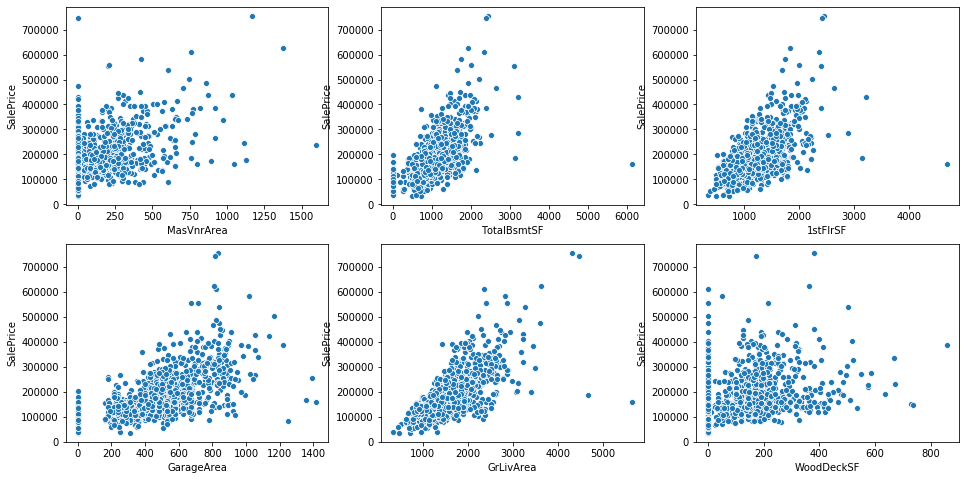

In [85]:
#Lets plot scatter plot for some columns and check how that affects the sale price of houses.

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.scatterplot(house_prc.MasVnrArea,house_prc.SalePrice)
plt.subplot(2,3,2)
sns.scatterplot(house_prc.TotalBsmtSF,house_prc.SalePrice)
plt.subplot(2,3,3)
sns.scatterplot(house_prc['1stFlrSF'],house_prc.SalePrice)
plt.subplot(2,3,4)
sns.scatterplot(house_prc['GarageArea'],house_prc.SalePrice)
plt.subplot(2,3,5)
sns.scatterplot(house_prc['GrLivArea'],house_prc.SalePrice)
plt.subplot(2,3,6)
sns.scatterplot(house_prc['WoodDeckSF'],house_prc.SalePrice)
plt.show()

#### Insight:

We can see that the variables Masonry veneer area in square feet, Total square feet of basement area, First Floor square feet,
Size of garage, Above grade (ground) living area and have a positive impact on the sale price of the house. As these increast the price of the house is likely to increase too.

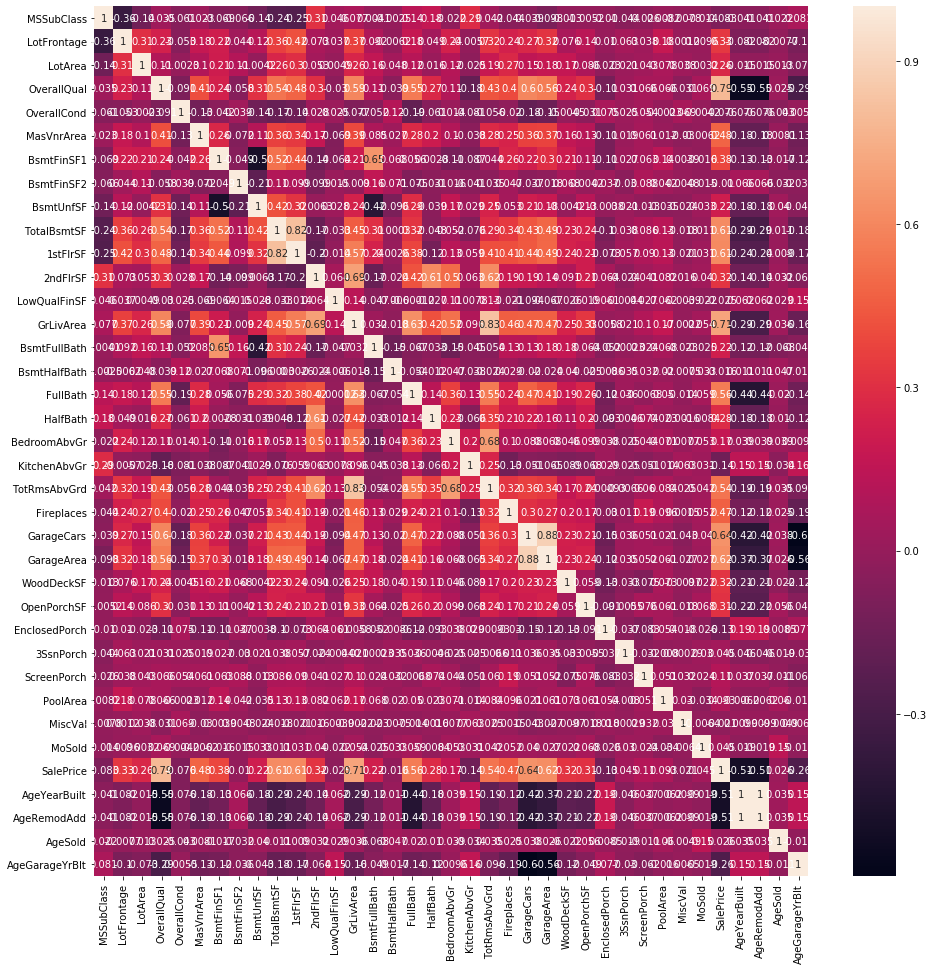

In [86]:
#Plotting a heat map to see the colinearity between continous variables.

plt.figure(figsize=(16,16))
sns.heatmap(house_prc[list(house_prc.dtypes[house_prc.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [87]:
house_prc.shape

(1451, 80)

In [88]:
house_prc.shape

(1451, 80)

In [89]:
#Listing the categorical variables
house_prc[list(house_prc.dtypes[house_prc.dtypes=='object'].index)].head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


On checking we found that some columns have some kind of ordr. Lets pick those columns and assign dummy variables.

In [90]:
#Creating functions to assign dummy variables to categorical variables.

def functional_mapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

def rating_mapper(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def house_status_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def plot_shape_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def sloper_mapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

In [91]:
#Applying the functions.

house_prc[['LotShape']] = house_prc[['LotShape']].apply(plot_shape_mapper)
house_prc[['LandSlope']] = house_prc[['LandSlope']].apply(sloper_mapper)
house_prc[['Functional']] = house_prc[['Functional']].apply(functional_mapper)
house_prc[['Fence']] = house_prc[['Fence']].apply(fence_mapper)
house_prc[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
           'GarageCond', 'PoolQC']] = house_prc[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                                                 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                                                 'GarageCond', 'PoolQC']].apply(rating_mapper)
house_prc[['BsmtExposure']] = house_prc[['BsmtExposure']].apply(rating_mapper1)
house_prc[['BsmtFinType1', 'BsmtFinType2']] = house_prc[['BsmtFinType1', 'BsmtFinType2']].apply(rating_mapper2)
house_prc[['GarageFinish']] = house_prc[['GarageFinish']].apply(house_status_mapper)

In [92]:
#checking the columns after applying functions
house_prc[['LotShape','LandSlope','Functional','Fence','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
           'GarageCond', 'PoolQC','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageFinish']].head()

,LotShape,LandSlope,Functional,Fence,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish
0,3,2,7,0,4,3,4,3,5,4,0,3,3,0,1,6,1,2
1,3,2,7,0,3,3,4,3,5,3,3,3,3,0,4,5,1,2
2,2,2,7,0,4,3,4,3,5,4,3,3,3,0,2,6,1,2
3,2,2,7,0,3,3,3,4,4,4,4,3,3,0,1,5,1,1
4,2,2,7,0,4,3,4,3,5,4,3,3,3,0,3,6,1,2


In [93]:
house_prc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass        1451 non-null int64
MSZoning          1451 non-null object
LotFrontage       1451 non-null float64
LotArea           1451 non-null int64
Street            1451 non-null object
Alley             1451 non-null object
LotShape          1451 non-null int64
LandContour       1451 non-null object
Utilities         1451 non-null object
LotConfig         1451 non-null object
LandSlope         1451 non-null int64
Neighborhood      1451 non-null object
Condition1        1451 non-null object
Condition2        1451 non-null object
BldgType          1451 non-null object
HouseStyle        1451 non-null object
OverallQual       1451 non-null int64
OverallCond       1451 non-null int64
RoofStyle         1451 non-null object
RoofMatl          1451 non-null object
Exterior1st       1451 non-null object
Exterior2nd       1451 non-null object
MasVnrType        1451 non-null object
M

In [94]:
house_prc.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
0,60,RL,65.0,8450,Pave,None,3,Lvl,AllPub,Inside,...,None,0,2,WD,Normal,208500,16,16,11,16.0
1,20,RL,80.0,9600,Pave,None,3,Lvl,AllPub,FR2,...,None,0,5,WD,Normal,181500,43,43,12,43.0
2,60,RL,68.0,11250,Pave,None,2,Lvl,AllPub,Inside,...,None,0,9,WD,Normal,223500,17,17,11,18.0
3,70,RL,60.0,9550,Pave,None,2,Lvl,AllPub,Corner,...,None,0,2,WD,Abnorml,140000,49,49,13,21.0
4,60,RL,84.0,14260,Pave,None,2,Lvl,AllPub,FR2,...,None,0,12,WD,Normal,250000,19,19,11,19.0


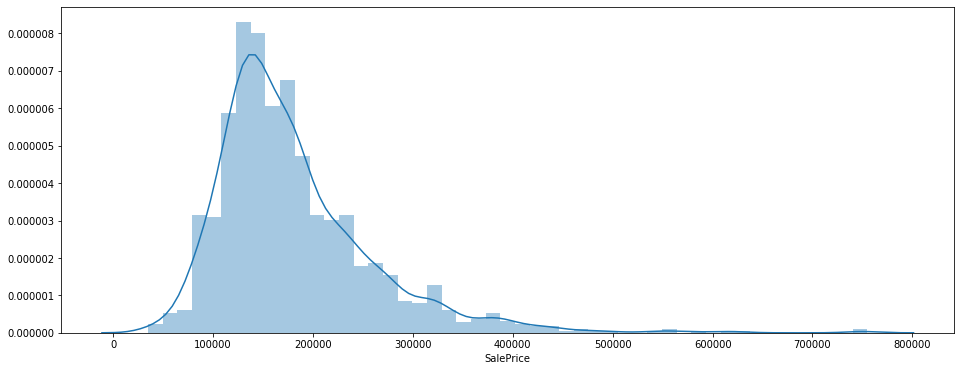

In [95]:
#Checking the distribution of our target variable.

plt.figure(figsize=(16,6))
sns.distplot(house_prc.SalePrice)
plt.show()

The graph looks normally distributed. We can go ahead with our regression process.

### Data Preparation

In [96]:
#Splitting the data into X and y

X = house_prc.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition',
       'AgeSold', 'AgeGarageYrBlt', 'AgeYearBuilt', 'AgeRemodAdd']]
y = house_prc['SalePrice']

Lets put all the categorical variables in a separate df to create dummies for them

In [97]:
#Separating categorical variables

df_categorical = X.select_dtypes(include=['object'])
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
#Assigning dummies to categorical features

dummies = pd.get_dummies(df_categorical, drop_first=True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [99]:
#Concatinating dummy variables

X = pd.concat([X, dummies], axis=1)

In [100]:
#Dropping original categorical features\

X = X.drop(list(df_categorical.columns), axis=1)


In [101]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,2,7,5,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,2,6,8,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2,2,7,5,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,2,2,7,5,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2,2,8,5,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


### Scaling and Spilitting the data

In [102]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=201)

In [103]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

Now that we have prepared our data lets move to Model building and evaluation. We will perform both Ridge and Lasso regression. 

### Model Building and Evaluation

#### Ridge Regression

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [105]:
#Analysing cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032797,0.006967,0.004002,0.001549,0.0001,{'alpha': 0.0001},-24838.385302,-15919.989760,-23522.185460,-35414.760028,...,-24214.516373,6374.373388,28,-13165.663265,-14546.244331,-14068.196249,-13384.609964,-13430.307333,-13719.004228,511.392784
1,0.031399,0.004840,0.004800,0.002225,0.001,{'alpha': 0.001},-24836.767437,-15919.489592,-23522.226742,-35353.855182,...,-24201.704333,6353.174277,27,-13165.602499,-14546.194737,-14068.151049,-13385.934587,-13430.219239,-13719.220422,511.220703
2,0.032197,0.008332,0.004400,0.001856,0.01,{'alpha': 0.01},-24821.550915,-15914.667452,-23523.863239,-34775.678276,...,-24080.384943,6152.954995,26,-13165.126072,-14545.913994,-14067.749534,-13399.735174,-13429.375845,-13721.580124,509.503329
3,0.018200,0.000402,0.002798,0.000399,0.05,{'alpha': 0.05},-24777.217922,-15904.183021,-23525.159157,-32722.374909,...,-23651.897201,5458.419155,25,-13166.033934,-14547.531104,-14066.956099,-13472.457475,-13427.991491,-13736.194021,501.457816
4,0.020001,0.003165,0.003001,0.000004,0.1,{'alpha': 0.1},-24743.067428,-15902.506131,-23518.261830,-30921.507597,...,-23276.895743,4877.318202,24,-13168.503513,-14549.996031,-14068.440172,-13553.311103,-13431.364752,-13754.323114,493.894210


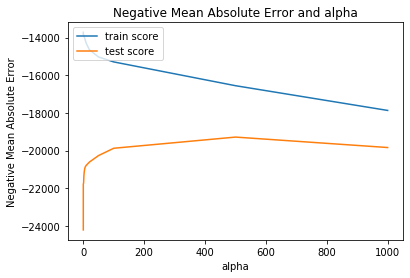

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
# finding best parameter (alpha)
model_cv.best_params_

{'alpha': 500}

From the graph we can clearly see that the best value for alpha is 500. At 500 negative mean absolute error is closest to train score.

In [108]:
#It is confirmed by graph as well
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.51295036e+03,  3.64630171e+02,  2.64264787e+03, -4.95312370e+02,
       -9.80015048e+02,  8.51230691e+03,  2.56547799e+03,  3.88993429e+03,
        3.88440768e+03,  4.91169990e+02,  3.93744756e+03, -5.71890097e+02,
        4.44193706e+03,  3.49568122e+03, -2.37047818e+02, -9.68049004e+02,
        2.93739316e+03,  1.65718419e+03,  5.49060321e+03,  4.35957261e+03,
        4.18560665e+02,  7.67794490e+03,  2.87074383e+03, -7.49755480e+02,
        3.40440802e+03,  2.26183213e+03,  3.87441667e+02, -1.74567668e+03,
        4.43014724e+03,  5.21112592e+03,  2.31129327e+03,  2.94615724e+03,
        1.91513425e+03,  1.92270636e+03,  5.04095302e+03,  3.08097045e+03,
       -3.64384677e+02,  6.91257552e+02,  2.06231239e+03,  9.33717829e+02,
        4.06140047e+01,  1.07927965e+03,  1.75595949e+03,  5.14601010e+02,
        8.41685782e+02, -5.48064743e+01,  2.02616824e+01,  3.99725190e+02,
        9.00970577e+01,  7.05721706e+02, -1.33701691e+03, -1.33701691e+03,
        5.51774475e+02,  

In [109]:
#finding r2 score 

from sklearn.metrics import r2_score


y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8765208976068366
0.8494443734207066


In [110]:
ridge.coef_

array([-2.51295036e+03,  3.64630171e+02,  2.64264787e+03, -4.95312370e+02,
       -9.80015048e+02,  8.51230691e+03,  2.56547799e+03,  3.88993429e+03,
        3.88440768e+03,  4.91169990e+02,  3.93744756e+03, -5.71890097e+02,
        4.44193706e+03,  3.49568122e+03, -2.37047818e+02, -9.68049004e+02,
        2.93739316e+03,  1.65718419e+03,  5.49060321e+03,  4.35957261e+03,
        4.18560665e+02,  7.67794490e+03,  2.87074383e+03, -7.49755480e+02,
        3.40440802e+03,  2.26183213e+03,  3.87441667e+02, -1.74567668e+03,
        4.43014724e+03,  5.21112592e+03,  2.31129327e+03,  2.94615724e+03,
        1.91513425e+03,  1.92270636e+03,  5.04095302e+03,  3.08097045e+03,
       -3.64384677e+02,  6.91257552e+02,  2.06231239e+03,  9.33717829e+02,
        4.06140047e+01,  1.07927965e+03,  1.75595949e+03,  5.14601010e+02,
        8.41685782e+02, -5.48064743e+01,  2.02616824e+01,  3.99725190e+02,
        9.00970577e+01,  7.05721706e+02, -1.33701691e+03, -1.33701691e+03,
        5.51774475e+02,  

In [111]:
#Creating table for coefficints and intercepts
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [112]:
#Finding out top 10 features for Ridge 
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,180332.462622
6,OverallCond,8512.306905
22,BsmtFullBath,7677.944904
83,Neighborhood_OldTown,5683.816908
19,2ndFlrSF,5490.603214
82,Neighborhood_NridgHt,5458.006040
30,Functional,5211.125919
35,GarageArea,5040.953023
13,BsmtFinType1,4441.937063
29,TotRmsAbvGrd,4430.147242


### Lasso Regression

In [113]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   53.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [114]:
#Cross validation results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.476430,0.090496,0.003379,0.000806,0.0001,{'alpha': 0.0001},-24664.346844,-15927.720798,-23759.567031,-27616.711556,...,-22654.979605,3923.027470,28,-13186.677471,-14568.234079,-14097.486758,-13762.887304,-13465.327022,-13816.122527,483.100439
1,0.496054,0.078722,0.003597,0.002244,0.001,{'alpha': 0.001},-24664.388189,-15927.718798,-23759.435962,-27616.591012,...,-22654.924392,3922.998904,27,-13186.677731,-14568.234012,-14097.485843,-13762.891593,-13465.323695,-13816.122575,483.100632
2,0.407389,0.044515,0.001802,0.001471,0.01,{'alpha': 0.01},-24664.801670,-15927.698789,-23758.125272,-27615.385878,...,-22654.372330,3922.713382,26,-13186.682700,-14568.233557,-14097.478203,-13762.934506,-13465.290483,-13816.123890,483.102184
3,0.451914,0.042321,0.004927,0.005468,0.05,{'alpha': 0.05},-24666.639931,-15927.609828,-23752.300165,-27610.038758,...,-22651.920679,3921.447878,25,-13186.714060,-14568.231522,-14097.447016,-13763.125755,-13465.142908,-13816.132252,483.106981
4,0.443146,0.102979,0.000399,0.000799,0.1,{'alpha': 0.1},-24668.938765,-15927.498495,-23745.019510,-27603.378702,...,-22648.861207,3919.874788,24,-13186.753263,-14568.228926,-14097.408442,-13763.346016,-13464.958412,-13816.139012,483.113458


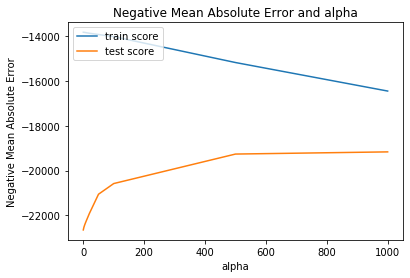

In [115]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [116]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 1000}

It is also confirmed by the graph that for Lasso also the best value of aplha is 1000.

In [117]:
#Fitting the model

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
lasso.coef_


array([-6.69203309e+03, -0.00000000e+00,  3.08216603e+03, -0.00000000e+00,
       -0.00000000e+00,  1.64787146e+04,  2.72401644e+03,  2.83695793e+03,
        3.58342497e+03,  0.00000000e+00,  3.44213763e+03, -0.00000000e+00,
        6.28419664e+03,  4.12778524e+03, -0.00000000e+00, -6.35298815e+02,
        0.00000000e+00,  1.23761936e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.76085541e+04,  3.29138379e+03, -0.00000000e+00,
        7.21267072e+02,  1.87444127e+02, -0.00000000e+00, -6.27222114e+02,
        4.65414465e+03,  6.76847106e+02,  2.87066646e+03,  2.21157843e+03,
        0.00000000e+00,  1.01000208e+03,  8.23025132e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  9.87052762e+02,  0.00000000e+00,
       -6.97364500e+01,  3.31190303e+02,  8.36044638e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.92027446e+02, -7.05702716e-13,
        0.00000000e+00,  

As we can see Lasso has eliminated so many features.

In [119]:
#Getting R2 score

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.883045899681728
0.8403949923772969


In [120]:
#Creating table for coefficints and intercepts

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [121]:
#Finding out top 10 features for Lasso 
lasso_coef.sort_values(by='Coef',ascending=False).head(200)


,Featuere,Coef
0,MSSubClass,1.801377e+05
22,BsmtFullBath,2.760855e+04
6,OverallCond,1.647871e+04
35,GarageArea,8.230251e+03
83,Neighborhood_OldTown,8.146621e+03
13,BsmtFinType1,6.284197e+03
82,Neighborhood_NridgHt,6.047135e+03
29,TotRmsAbvGrd,4.654145e+03
14,BsmtFinSF2,4.127785e+03
89,Neighborhood_Timber,3.774887e+03


#### Evaluation:
- We can see in both the methods R2 scores are pretty good and similar.
- But Lasso brings down the no. of features to 49 by elimimating unnecessary features. 
- So I choose Lasso model as the final model for the price prediction as it is less complex.

_Best alpha value for Lasso_ : {'alpha': 1000}

_Best alpha value for Ridge_ : {'alpha': 500}


#### As per the Lasso model the top 10 features that positively affects the price of the house the most are :

1.  *MSSubClass*	  : The type of dwelling involved in the sale        
2.	*BsmtFullBath*  : Basement full bathrooms        
3.	*OverallCond*	  : The overall condition of the house          
4.	*GarageArea*	  : Size of garage         
5.	*Neighborhood_OldTown*	: The house is in OldTown neighborhood or not
6.	*BsmtFinType1*        : Rating of basement finished area
7.	*Neighborhood_NridgHt*	: The house is in Northridge Heights or not
8. *TotRmsAbvGrd* : Total rooms above grade (does not include bathrooms)
9. *BsmtFinSF2* : Type 2 finished square feet
10. *Neighborhood_Timber*: The house is in notTimberland neighborhood or 

#### Top 07 features that nagetively affects the price of the house the most are :

1.  *MSZoning_FV*	  : Floating Village Residential zone       
2.	*RoofStyle_Hip*  : Hip Type of roof        
3.	*LotConfig_Inside*	  : Lot configuration - Inside        
4.	*Neighborhood_SWISU*	  : South & West of Iowa State University Neighborhood         
5.	*Exterior1st_WdShing*	: Exterior covering on house- Wood shining
6.	*3SsnPorch*        : Three season porch area in square feet
7.	*HouseStyle_2Story*	: Style of dwelling - Two story


The company must consider the list of features above while buying the houses. It should concentrate more on the features that affects the price of the house positively and at the same time should avoid the features which reduces the price of the house.

### Subjective Questions

#### Q1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [122]:
#Lets double the value of alpha for Ridge first. Optimum alpha for ridge is 500 in our model.

alpha = 1000
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)
ridge1.coef_

array([-1.77978168e+03,  1.00055689e+03,  2.28603358e+03, -8.04856283e+02,
       -8.64314049e+02,  6.98131093e+03,  1.79099105e+03,  3.50217111e+03,
        3.94967893e+03,  4.71180123e+02,  3.34858426e+03, -1.57020610e+02,
        3.61737462e+03,  2.96634959e+03, -1.08760167e+02, -4.19540678e+02,
        3.24307413e+03,  1.74993805e+03,  4.83581631e+03,  3.39563453e+03,
        4.40347269e+02,  6.40037436e+03,  2.56575830e+03, -6.30696931e+02,
        3.18249422e+03,  2.06187088e+03,  8.14942455e+02, -1.20739993e+03,
        4.19328413e+03,  4.59792978e+03,  1.81980704e+03,  2.96534052e+03,
        2.46165304e+03,  1.97209850e+03,  4.25686885e+03,  3.30216897e+03,
       -6.95091293e+01,  5.46002963e+02,  2.06323999e+03,  1.11050958e+03,
       -5.71586136e+01,  8.29666169e+02,  1.50907342e+03,  5.48531836e+02,
        8.15699780e+02, -2.13084054e+02, -1.04171932e+00,  4.26708306e+02,
        1.20900185e+02,  2.48725279e+02, -1.68540112e+03, -1.68540112e+03,
        4.06266522e+02,  

In [123]:
#finding r2 score 

from sklearn.metrics import r2_score


y_pred_train1 = ridge1.predict(X_train)
print(r2_score(y_train,y_pred_train1))

y_pred_test1 = ridge1.predict(X_test)
print(r2_score(y_test,y_pred_test1))

0.8555953870015789
0.8383286526199449


In [124]:
#Lets double the value of alpha for Lasso now. Optimum alpha for lasso is 1000 in our model.

alpha = 2000

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train)

Lasso(alpha=2000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
lasso1.coef_

array([-5967.06110519,    -0.        ,  2767.64536253,    -0.        ,
          -0.        , 18303.01513813,  1168.19429518,  2028.8697238 ,
        4510.46529726,     0.        ,  2837.56488914,    -0.        ,
        5770.05939064,  3784.07534303,    -0.        ,    -0.        ,
           0.        ,   879.37917264,  1168.25527351,     0.        ,
          -0.        , 25876.02343875,  2863.82574293,    -0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
        5074.7174585 ,     0.        ,  2266.08605828,  2204.23207608,
           0.        ,   737.81324152,  7959.73466106,     0.        ,
          -0.        ,     0.        ,   739.74508852,     0.        ,
          -0.        ,     0.        ,    41.51379207,    -0.        ,
          -0.        ,    -0.        ,     0.        ,     0.        ,
           0.        ,     0.        , -1414.11941407,    -0.        ,
           0.        ,     0.        ,     0.        , -1463.37166441,
      

In [126]:
#Getting R2 score

y_train_pred1 = lasso1.predict(X_train)
y_test_pred1 = lasso1.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred1))
print(r2_score(y_true=y_test,y_pred=y_test_pred1))

0.8646542578910884
0.8327061279622385


•	We doubled the value of alpha and found that that the R2 score of Ridge and lasso is decreasing by 2% and Lasso is eliminating a lot of features which over simplifies the model.

In [127]:
#Creating table for coefficints and intercepts for the new model.

model_param1 = list(lasso1.coef_)
model_param1.insert(0,lasso1.intercept_)
cols1 = X_train.columns
cols1.insert(0,'const')
lasso_coef1 = pd.DataFrame(list(zip(cols1,model_param1)))
lasso_coef1.columns = ['Featuere','Coef']

In [128]:
#Finding out top 10 features for Lasso 
lasso_coef1.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,180030.139002
22,BsmtFullBath,25876.023439
6,OverallCond,18303.015138
35,GarageArea,7959.734661
83,Neighborhood_OldTown,7186.220782
13,BsmtFinType1,5770.059391
82,Neighborhood_NridgHt,5285.949505
29,TotRmsAbvGrd,5074.717458
9,ExterCond,4510.465297
14,BsmtFinSF2,3784.075343


#### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [129]:
#Lets remove the top 5 predictor features from our incoming data

X_train1 = X_train.drop(['MSSubClass','BsmtFullBath','OverallCond','GarageArea','Neighborhood_OldTown'],axis=1)
X_test1 = X_test.drop(['MSSubClass','BsmtFullBath','OverallCond','GarageArea','Neighborhood_OldTown'],axis=1)

In [130]:
#Fitting the new data to LAsso
alpha = 1000

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train1, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [131]:
#Creating table for coefficints and intercepts for the new model.

model_param2 = list(lasso2.coef_)
model_param2.insert(0,lasso2.intercept_)
cols2 = X_train1.columns
cols2.insert(0,'const')
lasso_coef2 = pd.DataFrame(list(zip(cols2,model_param2)))
lasso_coef2.columns = ['Featuere','Coef']

In [132]:
#Finding out top 5 features
lasso_coef2.sort_values(by='Coef',ascending=False).head()

,Featuere,Coef
0,LotFrontage,180198.053505
20,BsmtHalfBath,28320.427245
5,MasVnrArea,16425.148414
32,GarageCond,8077.084670
79,Neighborhood_SWISU,7883.831973


So after removing the top 5 features from the input data we ran the model and found the above top5 features for lasso.